In [1]:
import nltk 
import random 
from nltk.classify.scikitlearn import SklearnClassifier 
import pickle 
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI 
from statistics import mode 
from nltk.tokenize import word_tokenize 
import re 
import os 

In [2]:
files_pos = os.listdir('acl-imdb-v1/train/pos') 
files_pos = [open('acl-imdb-v1/train/pos/'+f,'r',encoding = 'utf8').read() for f in files_pos] 
files_neg = os.listdir('acl-imdb-v1/train/neg') 
files_neg = [open('acl-imdb-v1/train/neg/'+f,'r',encoding = 'utf8').read() for f in files_neg] 


In [3]:
len(files_pos),len(files_neg) 

(12500, 12500)

In [4]:
files_pos = files_pos[0:1000] 
files_neg = files_neg[0:1000] 

In [5]:
len(files_pos),len(files_neg) 

(1000, 1000)

In [6]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))

In [7]:
all_words  = []
documents = []

allowed_words_types = ["J"]
for p in files_pos:
    documents.append( (p, "pos") )
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',p)
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    pos = nltk.pos_tag(stopped)
    for w in pos :
        if w[1][0] in allowed_words_types:
            all_words.append(w[0].lower())

for p in files_neg:
    documents.append( (p, "neg") )
    cleaned = re.sub(r'[^(a-zA-Z)\s]','',p)
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    pos = nltk.pos_tag(stopped)
    for w in pos :
        if w[1][0] in allowed_words_types:
            all_words.append(w[0].lower())
            

In [8]:
all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1157, 'bad': 743, 'great': 660, 'much': 482, 'little': 482, 'many': 480, 'first': 374, 'best': 357, 'real': 317, 'br': 302, ...})

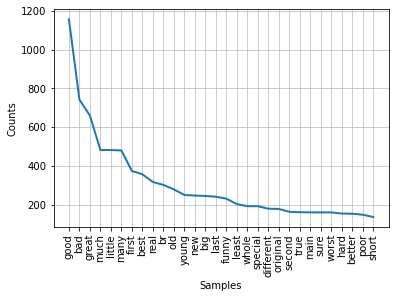

In [9]:
import matplotlib.pyplot as plt
all_words.plot(30,cumulative = False)
plt.show()